In [4]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps


In [5]:
def take_mult(img, filt):
    img = np.array(img)
    img = img.astype('float')
    fft_img = np.fft.fft2(img)
    fft_img_shift = np.fft.fftshift(fft_img)
    
    magnitude_spectrum = 20*np.log(1+np.abs(fft_img_shift))
#     fft_img_shift[h_rows -10:h_rows +10, h_cols -10:h_cols +10] = 0

    new_img = np.multiply(fft_img_shift, filt)
    magnitude_spectrum2 = 20*np.log(1+np.abs(new_img))

#   Making Image Back to Spatial Domain
#     new_img_ifft = np.fft.ifftshift(new_img)
    new_img_ifft = new_img

    img_back = np.fft.ifft2(new_img_ifft)
    img_back = np.abs(img_back)
#     img_back = img_back.astype('uint8')
    
    figure = plt.figure(figsize=[20,20])
    plt.subplot(121),plt.imshow(magnitude_spectrum, cmap = 'gray')
    plt.title('Input Magnitude Spectrum'),plt.axis('off')
    plt.subplot(122),plt.imshow(magnitude_spectrum2, cmap = 'gray')
    plt.title('After Transform Magnitude Spectrum'),plt.axis('off')
    plt.show()
    
    return img_back


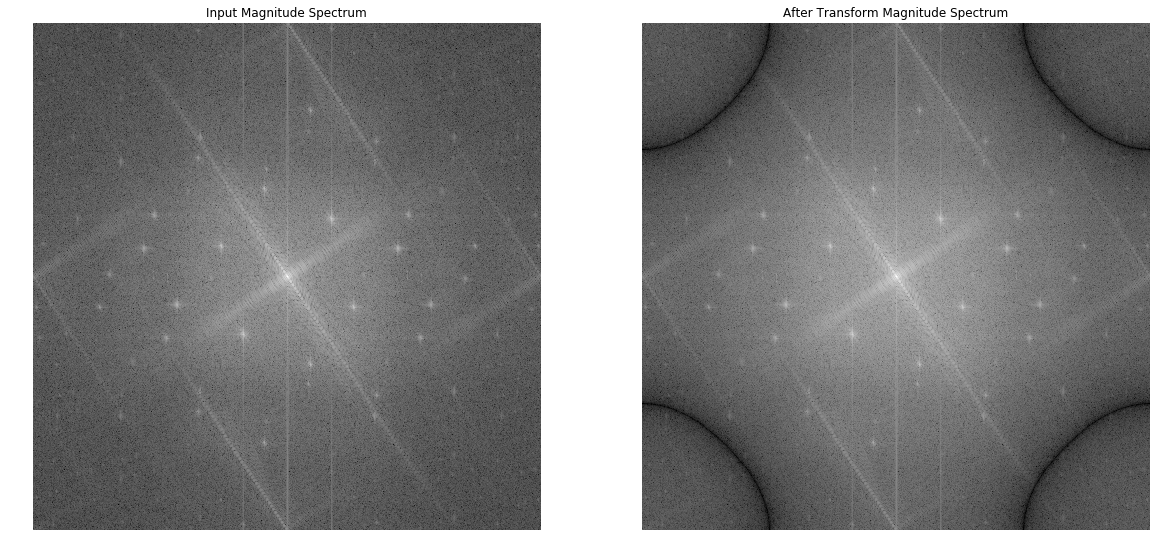

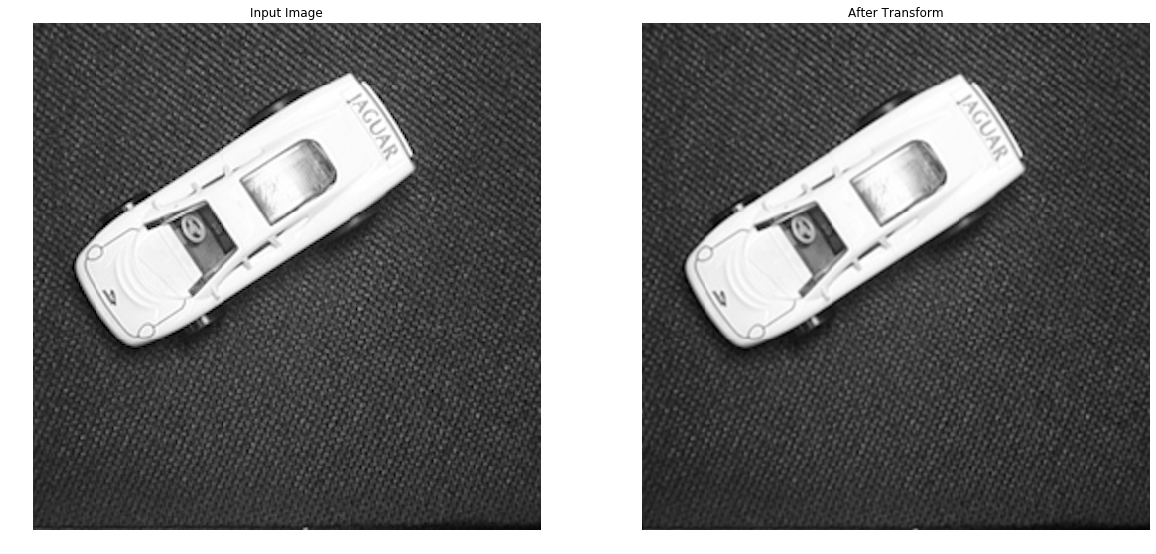

In [6]:
img = Image.open('../input_data/ImageProcessingDemo.png').convert('L')
img = np.array(img)

filt = [[0,1,0],[1,2,1],[0,1,0]]
# filt = [[1/9,1/9,1/9],[1/9,1/9,1/9],[1/9,1/9,1/9]]
fft_filt = np.fft.fft2(filt,img.shape)
fft_filt_shift = np.fft.fftshift(fft_filt)

ans = take_mult(img, fft_filt_shift)

figure = plt.figure(figsize=[20,20])
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'),plt.axis('off')
plt.subplot(122),plt.imshow(ans, cmap = 'gray')
plt.title('After Transform'),plt.axis('off')
plt.show()


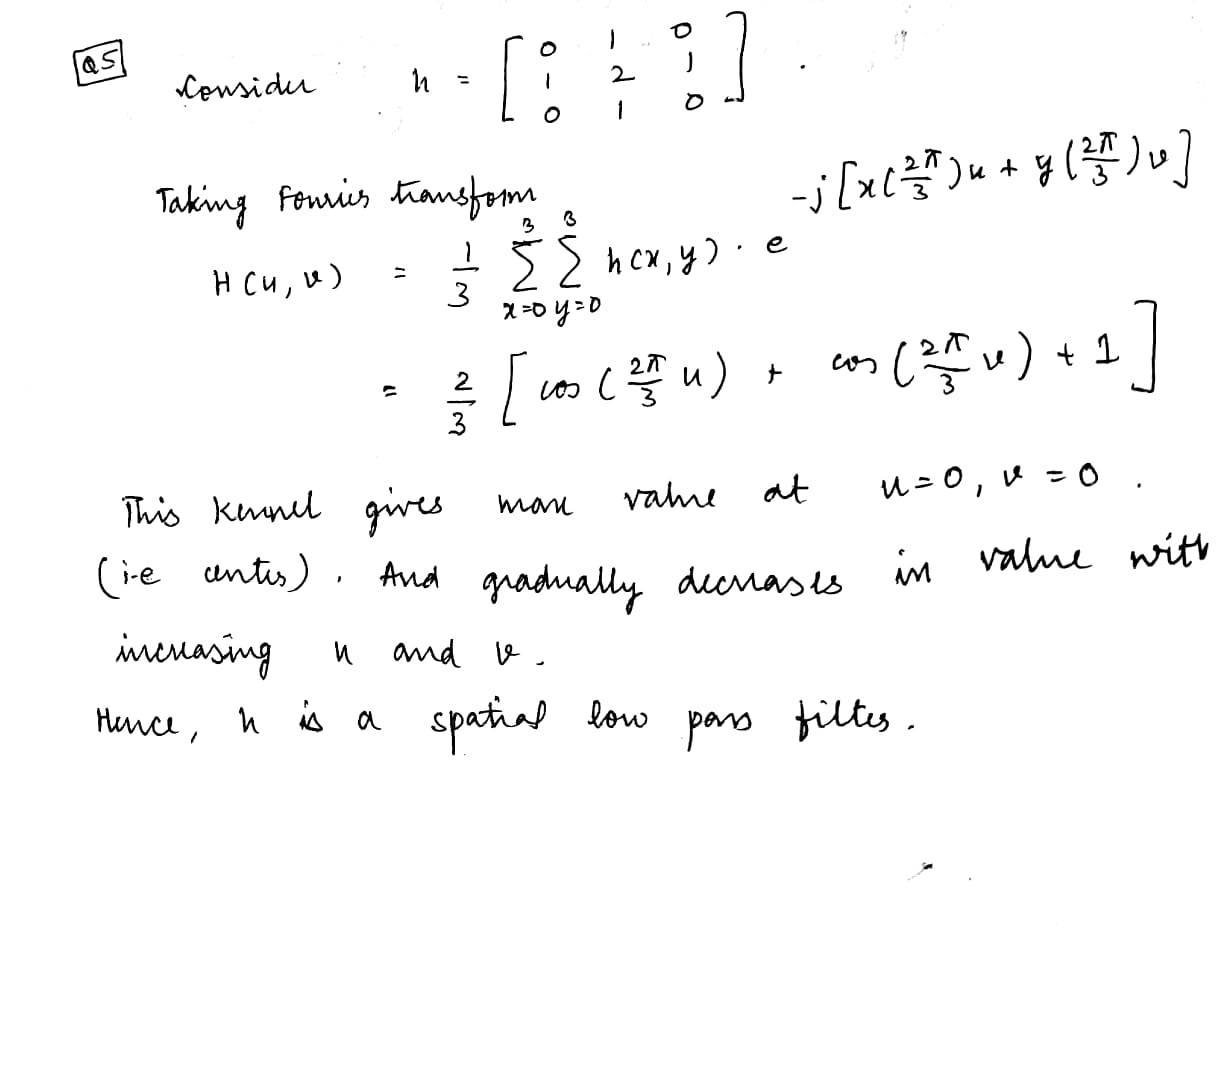